# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
file_path = "/content/dataset_kenyamanan_ruang_tidur (1).xlsx" #sesuaikan dengan alamat direktori dataset Anda.
df = pd.read_excel(file_path)
df = pd.DataFrame(df)

# K-Means Clustering


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df["Cuaca"].unique()

KeyError: 'Cuaca'

In [ ]:
df['Cuaca'] = df['Cuaca'].apply(lambda x: {'Clear Sky': 1, 'Clouds': 2, 'Rain': 3, 'Thunderstorm' : 4, 'Haze':5}.get(x))
df

,Suhu (°C),Kelembapan (%),Kebisingan (dB),Pencahayaan (lux),Kualitas Udara (ppm CO₂),Cuaca,Panjang (m),Lebar (m)
0,22.2,63,34,182,426,None,4,4
1,31.5,44,70,426,402,None,5,5
2,29.9,42,54,115,400,None,4,5
3,24.1,64,40,124,475,None,3,5
4,24.2,43,51,326,367,None,4,5
...,...,...,...,...,...,...,...,...
1346,21.0,61,35,300,454,None,4,5
1347,26.5,65,62,277,494,None,3,3
1348,20.5,41,52,182,357,None,3,4
1349,25.0,41,67,409,398,None,4,4


In [ ]:
# Melakukan shuffle pada DataFrame
df = df.sample(frac=1).reset_index(drop=True)
df

,lux,suara,tempereture,humidity,co2,cuaca,panjang,lebar
0,25,64,30.8,83,847,5,4,4
1,42,50,30.8,71,621,1,3,3
2,25,60,30.8,83,843,2,3,4
3,25,52,30.8,83,919,5,3,3
4,25,62,30.8,83,801,2,4,4
...,...,...,...,...,...,...,...,...
817,28,65,30.8,73,1000,2,4,4
818,35,53,30.8,66,972,3,4,4
819,105,60,30.8,81,777,1,3,4
820,89,58,30.8,75,711,3,3,3


In [ ]:
df_f = df.drop_duplicates()
dt = df_f

In [ ]:
features = ['lux', 'suara', 'tempereture', 'humidity',
            'co2','cuaca', 'panjang', 'lebar']
X = df_f[features]

In [ ]:
X.isna().sum()

,0
lux,0
suara,0
tempereture,0
humidity,0
co2,0
cuaca,0
panjang,0
lebar,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

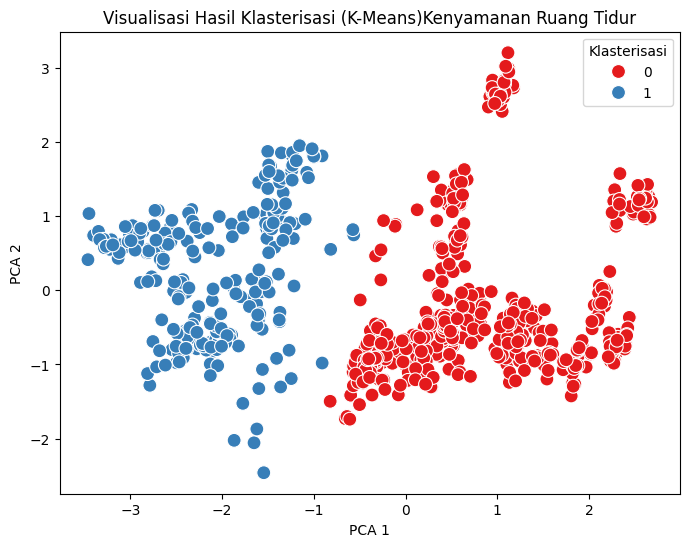

In [ ]:
# Visualisasi hasil clustering (PCA untuk mengurangi dimensi ke 2D)
from sklearn.decomposition import PCA

# Reduksi dimensi menjadi 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Membuat DataFrame untuk hasil PCA
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_f['Cluster']

# Plot visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1', s=100)
plt.title("Visualisasi Hasil Klasterisasi (K-Means)Kenyamanan Ruang Tidur")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Klasterisasi')
plt.show()

In [ ]:
df.to_excel('dataset_kenyamanan_ruang_tidur.xlsx', index=False)

print("\nHasil clustering telah disimpan ke 'kenyamanan_ruang_tidur_clustered.xlsx'.")


Hasil clustering telah disimpan ke 'kenyamanan_ruang_tidur_clustered.xlsx'.


In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2683


In [ ]:
cluster_counts = df['Cluster'].value_counts(normalize=True) * 100  # menghitung persentase
print("\nPersentase Data per Cluster:")
print(cluster_counts)


Persentase Data per Cluster:
Cluster
0    70.072993
1    29.927007
Name: proportion, dtype: float64


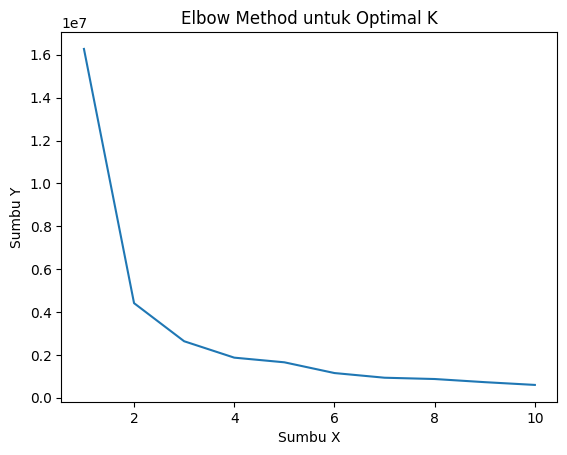

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Misalnya, X adalah data yang telah disiapkan
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method untuk Optimal K")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu Y")
plt.show()


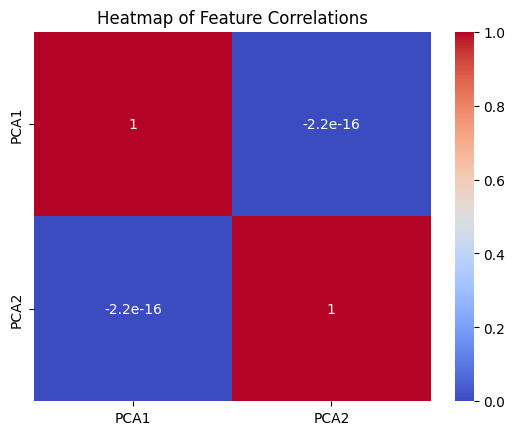

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar fitur
corr = df_pca[['PCA1', 'PCA2']].corr()

# Menampilkan heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df1 = df
X1 = df1[features]
X1

,Suhu (°C),Kelembapan (%),Kebisingan (dB),Pencahayaan (lux),Kualitas Udara (ppm CO₂),Cuaca,Panjang (m),Lebar (m)
0,32.0,57,38,173,368,1,3,4
1,28.0,68,46,463,430,2,5,3
2,26.3,45,70,344,417,3,5,3
3,26.4,47,58,104,497,1,4,5
4,21.6,65,53,266,388,2,3,5
...,...,...,...,...,...,...,...,...
1346,33.9,68,65,199,444,1,4,3
1347,34.8,40,52,269,456,3,5,4
1348,29.0,59,58,207,414,2,3,5
1349,33.7,66,42,272,396,1,3,4


In [ ]:
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X1)

In [ ]:
agg_clustering1 = AgglomerativeClustering(n_clusters=2, linkage='ward')  # linkage='ward' untuk meminimalkan varian dalam cluster
df1['Cluster'] = agg_clustering1.fit_predict(X_scaled1)


Langkah-langkah Penggabungan (Iterasi):
Iterasi 1: Menggabungkan cluster 251 dan 1078 dengan jarak 0.2502
Iterasi 2: Menggabungkan cluster 469 dan 510 dengan jarak 0.3572
Iterasi 3: Menggabungkan cluster 538 dan 930 dengan jarak 0.3882
Iterasi 4: Menggabungkan cluster 851 dan 990 dengan jarak 0.4265
Iterasi 5: Menggabungkan cluster 207 dan 321 dengan jarak 0.4385
Iterasi 6: Menggabungkan cluster 301 dan 1020 dengan jarak 0.4429
Iterasi 7: Menggabungkan cluster 558 dan 1169 dengan jarak 0.4507
Iterasi 8: Menggabungkan cluster 517 dan 1043 dengan jarak 0.4757
Iterasi 9: Menggabungkan cluster 256 dan 908 dengan jarak 0.4842
Iterasi 10: Menggabungkan cluster 190 dan 826 dengan jarak 0.4920
Iterasi 11: Menggabungkan cluster 323 dan 561 dengan jarak 0.5006
Iterasi 12: Menggabungkan cluster 749 dan 1234 dengan jarak 0.5253
Iterasi 13: Menggabungkan cluster 451 dan 663 dengan jarak 0.5348
Iterasi 14: Menggabungkan cluster 660 dan 854 dengan jarak 0.5373
Iterasi 15: Menggabungkan cluster 852 d

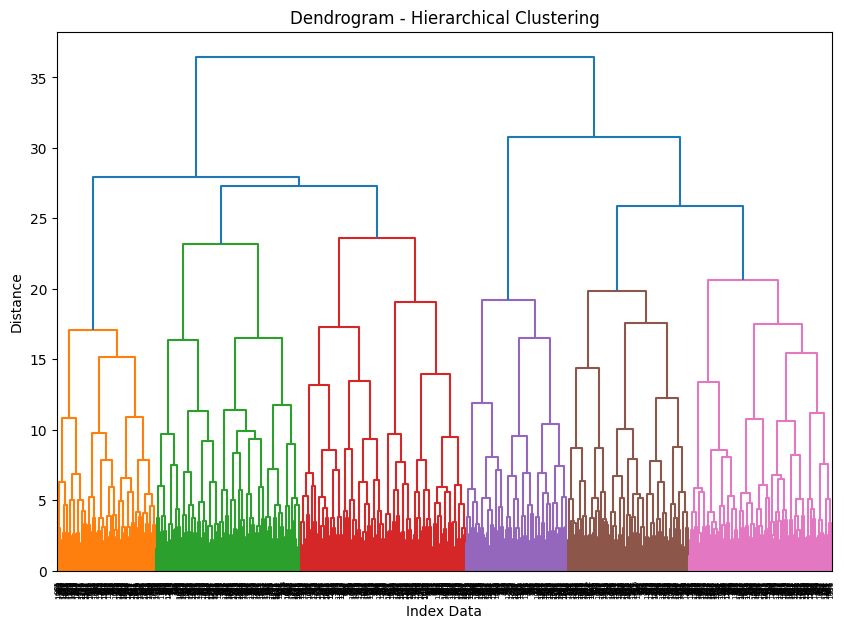

In [ ]:
linked = linkage(X_scaled1, method='ward')  # Menggunakan metode Ward untuk linkage

print("\nLangkah-langkah Penggabungan (Iterasi):")
for i, row in enumerate(linked):
    print(f"Iterasi {i+1}: Menggabungkan cluster {int(row[0])} dan {int(row[1])} dengan jarak {row[2]:.4f}")

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Index Data')
plt.ylabel('Distance')
plt.show()

In [ ]:
cluster_counts = df1['Cluster'].value_counts(normalize=True) * 100  # menghitung persentase
print("\nPersentase Data per Cluster:")
print(cluster_counts)


Persentase Data per Cluster:
Cluster
1    52.775722
0    47.224278
Name: proportion, dtype: float64


In [ ]:
sil_score1 = silhouette_score(X_scaled1, df1['Cluster'])  # Menghitung silhouette score
print("\nSilhouette Score: {:.4f}".format(sil_score1))


Silhouette Score: 0.0618


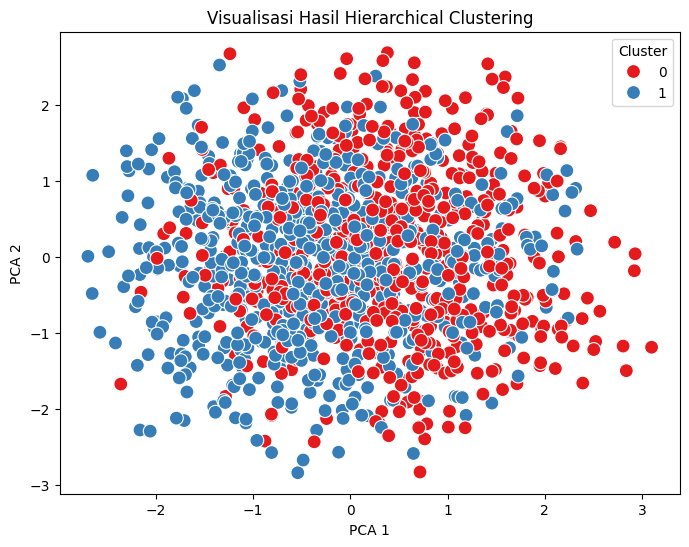

In [ ]:
ca = PCA(n_components=2)
X_pca1 = pca.fit_transform(X_scaled1)

# Membuat DataFrame baru untuk hasil PCA dan label cluster
df_pca1 = pd.DataFrame(X_pca1, columns=['PCA1', 'PCA2'])
df_pca1['Cluster'] = df1['Cluster']

# Plot scatter plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1', s=100, marker='o')

# Menambahkan label dan judul
plt.title('Visualisasi Hasil Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', loc='best')
plt.show()